# ETL and EDA

In [2]:
import ijson
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Initialize lists to store data
playlists_data = []
tracks_data = []

# Open the JSON file
with open('Data/spotify_million_playlist_dataset_challenge/challenge_set.json', 'r') as file:
    # Use ijson to parse the 'playlists' array
    playlists = ijson.items(file, 'playlists.item')
    for playlist in playlists:
        # Extract playlist-level data
        playlist_info = {
            'pid': playlist.get('pid'),
            'name': playlist.get('name'),
            'num_holdouts': playlist.get('num_holdouts'),
            'num_tracks': playlist.get('num_tracks'),
            'num_samples': playlist.get('num_samples'),
            'date': playlist.get('date'),
            'version': playlist.get('version')
        }
        playlists_data.append(playlist_info)
        
        # Extract track-level data
        for track in playlist.get('tracks', []):
            track_info = {
                'pid': playlist.get('pid'),
                'pos': track.get('pos'),
                'artist_name': track.get('artist_name'),
                'track_uri': track.get('track_uri'),
                'artist_uri': track.get('artist_uri'),
                'track_name': track.get('track_name'),
                'album_uri': track.get('album_uri'),
                'duration_ms': track.get('duration_ms'),
                'album_name': track.get('album_name')
            }
            tracks_data.append(track_info)

# Convert lists to DataFrames
playlists_df = pd.DataFrame(playlists_data)
tracks_df = pd.DataFrame(tracks_data)

playlists_df.head()
tracks_df.head()


,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,1000000,0,AronChupa,spotify:track:66U0ASk1VHZsqIkpMjKX3B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,163809,Little Swing
1,1000000,1,AronChupa,spotify:track:5MhsZlmKJG6X5kTHkdwC4B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,I'm an Albatraoz,spotify:album:1qHVYbxQ6IS8YRviorKDJI,166848,I'm an Albatraoz
2,1000000,2,Lorde,spotify:track:0GZoB8h0kqXn7XFm4Sj06k,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Yellow Flicker Beat - From The Hunger Games: M...,spotify:album:4UEPxQx0cTcYNsE0n32MHV,232506,Yellow Flicker Beat
3,1000000,3,Lorde,spotify:track:35kahykNu00FPysz3C2euR,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,White Teeth Teens,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,216600,Pure Heroine
4,1000000,4,Lorde,spotify:track:3G6hD9B2ZHOsgf4WfNu7X1,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Team,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,193058,Pure Heroine


In [11]:
# Check for missing values
print("Missing values from playlist dataset")
print(playlists_df.isnull().sum())
print("Missing values from track dataset")
print(tracks_df.isnull().sum())


Missing values from playlist dataset
pid                 0
name             2000
num_holdouts        0
num_tracks          0
num_samples         0
date            10000
version         10000
dtype: int64
Missing values from track dataset
pid            0
pos            0
artist_name    0
track_uri      0
artist_uri     0
track_name     0
album_uri      0
duration_ms    0
album_name     0
dtype: int64


In [15]:
playlists_df

,pid,name,num_holdouts,num_tracks,num_samples,date,version
0,1000002,spanish playlist,11,11,0,None,None
1,1000003,Groovin,48,48,0,None,None
2,1000004,uplift,40,40,0,None,None
3,1000006,WUBZ,27,27,0,None,None
4,1000007,new,41,41,0,None,None
...,...,...,...,...,...,...,...
9995,1006767,Playlist 2015,20,21,1,None,None
9996,1006771,Workout,24,25,1,None,None
9997,1006773,Girlz,16,17,1,None,None
9998,1006775,let's get lost,35,36,1,None,None


In [17]:
# Fill missing track names with a placeholder
playlists_df['name'].fillna('Unnamed playlist', inplace=True)

playlists_df.drop_duplicates(subset=['pid'], inplace=True)
tracks_df.drop_duplicates(subset=['track_uri'], inplace=True)


In [18]:
# Merge playlists with tracks on 'pid'
merged_df = pd.merge(tracks_df, playlists_df, on='pid', how='left')
merged_df.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,name,num_holdouts,num_tracks,num_samples,date,version
0,1000000,0,AronChupa,spotify:track:66U0ASk1VHZsqIkpMjKX3B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,Little Swing,spotify:album:4S5MLjwRSi0NJ5nikflYnZ,163809,Little Swing,Party,70,75,5,None,None
1,1000000,1,AronChupa,spotify:track:5MhsZlmKJG6X5kTHkdwC4B,spotify:artist:5vCOdeiQt9LyzdI87kt5Sh,I'm an Albatraoz,spotify:album:1qHVYbxQ6IS8YRviorKDJI,166848,I'm an Albatraoz,Party,70,75,5,None,None
2,1000000,2,Lorde,spotify:track:0GZoB8h0kqXn7XFm4Sj06k,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Yellow Flicker Beat - From The Hunger Games: M...,spotify:album:4UEPxQx0cTcYNsE0n32MHV,232506,Yellow Flicker Beat,Party,70,75,5,None,None
3,1000000,3,Lorde,spotify:track:35kahykNu00FPysz3C2euR,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,White Teeth Teens,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,216600,Pure Heroine,Party,70,75,5,None,None
4,1000000,4,Lorde,spotify:track:3G6hD9B2ZHOsgf4WfNu7X1,spotify:artist:163tK9Wjr9P9DmM0AVK7lm,Team,spotify:album:0rmhjUgoVa17LZuS8xWQ3v,193058,Pure Heroine,Party,70,75,5,None,None


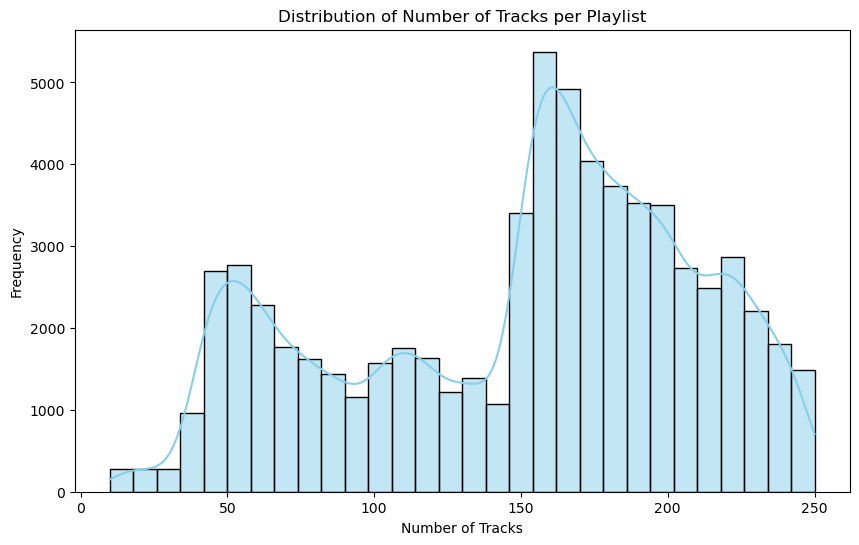

In [20]:
# Assuming 'merged_df' is your DataFrame
plt.figure(figsize=(10,6))
sns.histplot(merged_df['num_tracks'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Tracks per Playlist')
plt.xlabel('Number of Tracks')
plt.ylabel('Frequency')
plt.show()


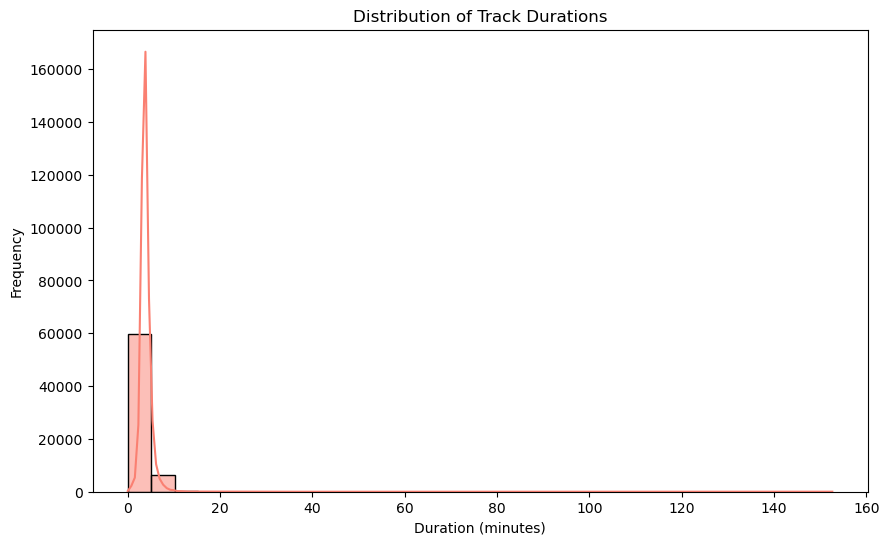

In [21]:
# Convert duration from milliseconds to minutes
merged_df['duration_min'] = merged_df['duration_ms'] / 60000

plt.figure(figsize=(10,6))
sns.histplot(merged_df['duration_min'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


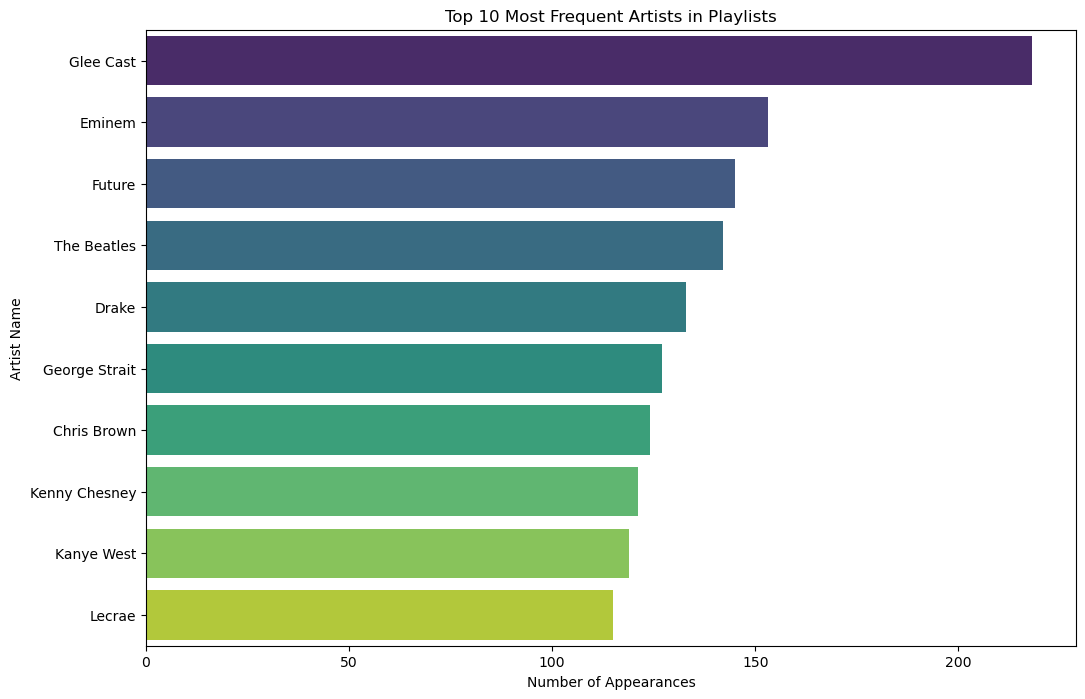

In [22]:
# Count occurrences of each artist
top_artists = merged_df['artist_name'].value_counts().head(10)

plt.figure(figsize=(12,8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Most Frequent Artists in Playlists')
plt.xlabel('Number of Appearances')
plt.ylabel('Artist Name')
plt.show()


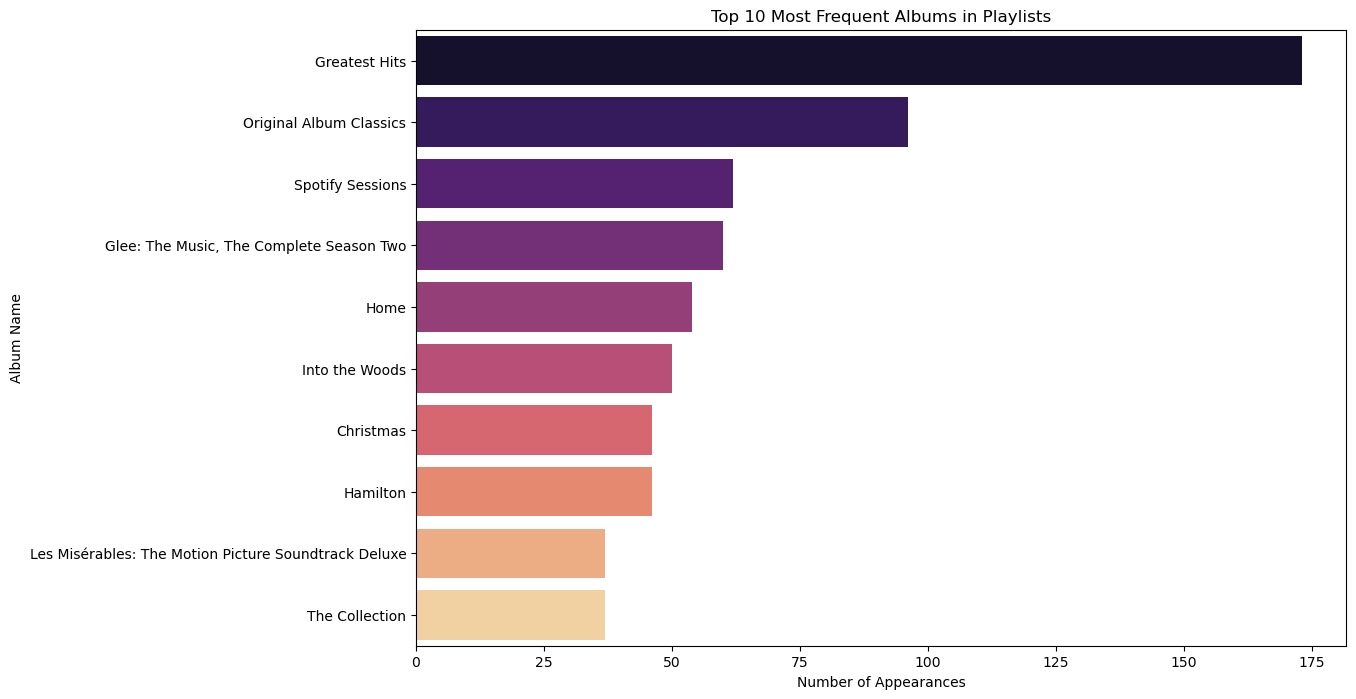

In [23]:
# Count occurrences of each album
top_albums = merged_df['album_name'].value_counts().head(10)

plt.figure(figsize=(12,8))
sns.barplot(x=top_albums.values, y=top_albums.index, palette='magma')
plt.title('Top 10 Most Frequent Albums in Playlists')
plt.xlabel('Number of Appearances')
plt.ylabel('Album Name')
plt.show()


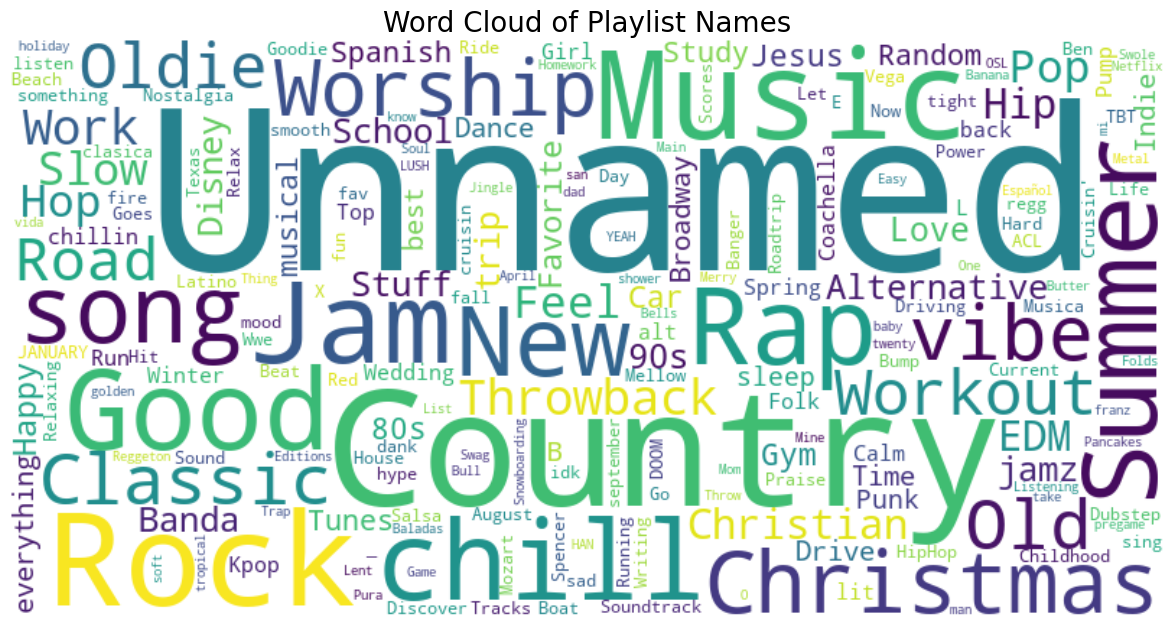

In [26]:
from wordcloud import WordCloud, STOPWORDS

# Combine all playlist names into a single string
playlist_names = ' '.join(merged_df['name'].dropna().astype(str).tolist())

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(['playlist', 'party', 'mix'])  # Add common words to exclude

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, collocations=False).generate(playlist_names)

plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Playlist Names', fontsize=20)
plt.show()
